# Exploratory Data Analysis

In this notebook, we don't answer any specific question, but simply get a feel for the data.

### Preliminaries

In [1]:
# Load dependencies
using Pkg
pkg"activate .."
using JSON, Statistics, Plots, Dates, LsqFit, TimeSeries
using StatsModels, GLM, HypothesisTests

 Activating environment at `~/classes/326/ECON-326-Project/Project.toml`


In [4]:
# Load data
data = JSON.parsefile("../data/covid_data.json");

In [5]:
# Unpack data
canada = data["Canada"]
confirmed = [point["confirmed"] for point in canada]
recovered = [point["recovered"] for point in canada]
deaths = [point["deaths"] for point in canada]
dates = Date.([point["date"] for point in canada]);

### Data Inspection

The first thing to check is whether the data is all sorted.

In [13]:
@show issorted(confirmed);
@show issorted(deaths);
@show issorted(recovered); 

issorted(confirmed) = true
issorted(deaths) = true
issorted(recovered) = false


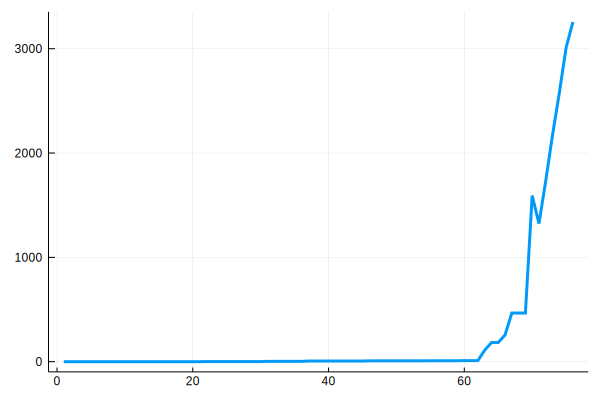

In [16]:
plot(recovered, legend = false, lw = 3)

The blip in `recovered` is likely a reporting error; if we end up using this field, we can either interpolate it somehow or track down the proper number.

We can also examine how the data increments are distributed.

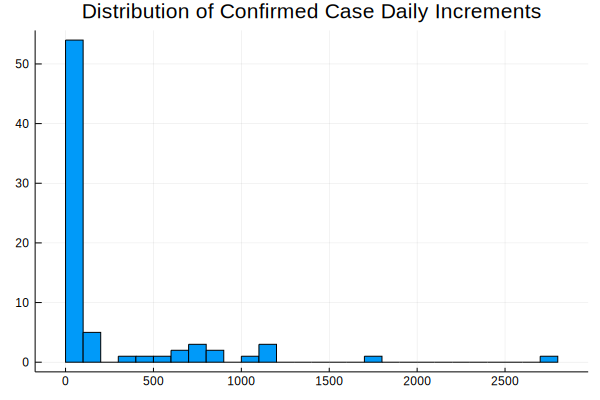

In [32]:
histogram(diff(confirmed), legend = false, title = "Distribution of Confirmed Case Daily Increments")

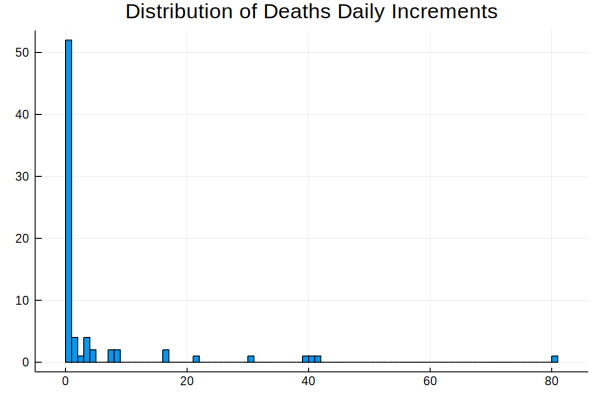

In [33]:
histogram(diff(deaths), legend = false, title = "Distribution of Deaths Daily Increments")

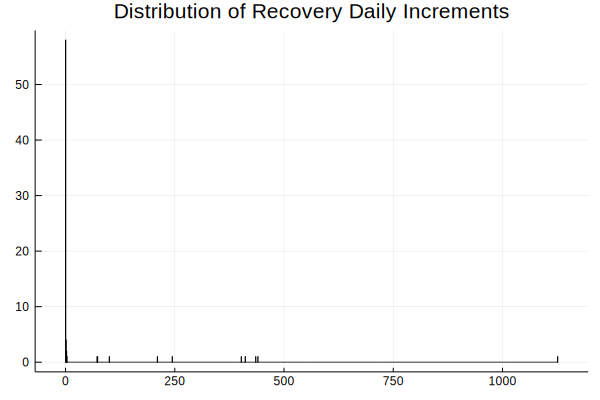

In [38]:
histogram(clamp.(diff(recovered), 0, Inf), legend = false, title = "Distribution of Recovery Daily Increments")

The `clamp` here is to account for the negative blip.

And observe the rough trends over time.

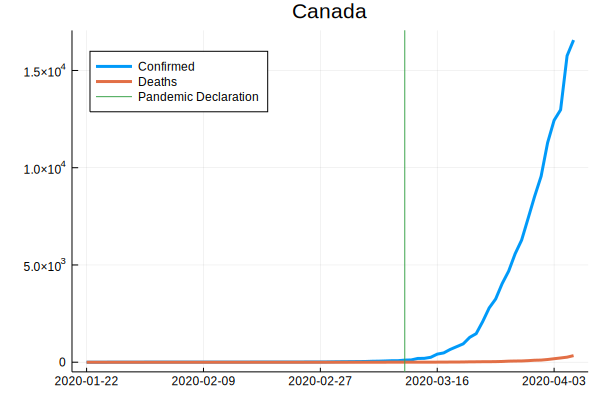

In [29]:
plot(dates, confirmed, title = "Canada", lw = 3, label = "Confirmed")
plot!(dates, deaths, title = "Canada", lw = 3, label = "Deaths", legend = :topleft, xticks = dates[1:18:end])
vline!([Date("2020-03-11")], label = "Pandemic Declaration")